In [1]:
#Conda env: py_3916

#Import packages
#---------------------------------------
import sys
from matplotlib import pyplot as plt
import numpy as np
import json
import pandas as pd
import seaborn as sns


#Import your modules
#---------------------------------------
import plaque_f as pf

# Define paths
#----------------------------------------------------------------------
l_code = '/Users/dominicburrows/Dropbox/PhD/Analysis/my_scripts/GitHub/'
l_data = '/Users/dominicburrows/Dropbox/PhD/analysis/Project/'
l_fig = '/Users/dominicburrows/Dropbox/PhD/figures/'

s_code = '/cndd3/dburrows/CODE/'
s_data = '/cndd3/dburrows/DATA/'
s_fig = '/cndd3/dburrows/FIGS/'

%load_ext autoreload
sys.version

'3.9.16 (main, Jan 11 2023, 16:05:54) \n[GCC 11.2.0]'

# Load data

In [8]:
def run_(name):
    # Declare paths
    data_path = s_data + 'spatial_transcriptomics/plaques/' + name + '.json'
    coord_path = '/cndd2/agelber/hal/qc_aligned/' + name + '/outs/spatial/tissue_positions.csv'
    genes_path = '/cndd2/agelber/hal/qc_aligned/' + name + '/outs/filtered_feature_bc_matrix.h5'
    meta = pd.read_csv('/cndd3/dburrows/DATA/spatial_transcriptomics/plaques/allspots_meta.csv') #FILTERED
    meta_filt = meta[meta['sample'] == name]

    spot_df, gene_df = pf.sort_data(data_path, coord_path, genes_path, 
                                    meta_filt, min_cell_per_gene=100, norm_factor=1e6)
    
    #Sanity check
    assert spot_df.shape[0] == gene_df.shape[0] == meta_filt.shape[0]
    assert 'Thy1' not in gene_df.columns.values or 'humanAPP' not in gene_df.columns.values
    print('Number of spots: ' + str(gene_df.shape[0]))
    print('Number of genes: ' + str(gene_df.shape[1]))
    return(spot_df, gene_df)

In [9]:
name = '030-D'
spot_df, gene_df = run_(name)

/home/dburrows/anaconda3/envs/py_3916/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/dburrows/anaconda3/envs/py_3916/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:197: UserWarning: Some cells have zero counts
  warn(UserWarning('Some cells have zero counts'))


Number of spots: 3382
Number of genes: 13185


In [382]:
spot_df
gene_df

,Sox17,Mrpl15,Lypla1,Tcea1,Rgs20,Atp6v1h,Oprk1,Rb1cc1,St18,Pcmtd1,...,mt-Nd4l,mt-Nd4,mt-Nd5,mt-Nd6,mt-Cytb,CAAA01118383.1,Vamp7,Spry3,Tmlhe,AC149090.1
AAACAAGTATCTCCCA-1,214.9151,0.000000,0.000000,71.638367,214.915100,429.830200,0.000000,0.000000,0.000000,71.638367,...,573.106934,18984.167969,3008.811523,71.638367,22924.277344,0.0,0.000000,0.000000,0.000000,143.276733
AAACAATCTACTAGCA-1,0.0000,0.000000,0.000000,0.000000,0.000000,158.906723,0.000000,0.000000,317.813446,158.906723,...,158.906723,8422.056641,1271.253784,158.906723,12076.911133,0.0,0.000000,0.000000,0.000000,0.000000
AAACAGAGCGACTCCT-1,0.0000,0.000000,0.000000,0.000000,0.000000,235.478806,0.000000,0.000000,0.000000,0.000000,...,1255.886963,28492.935547,2747.252686,235.478806,30847.722656,0.0,0.000000,0.000000,0.000000,156.985870
AAACAGTGTTCCTGGG-1,0.0000,0.000000,35.880875,0.000000,35.880875,215.285248,0.000000,35.880875,0.000000,143.523499,...,502.332245,19949.765625,2870.469971,35.880875,20452.097656,0.0,35.880875,35.880875,0.000000,287.046997
AAACATTTCCCGGATT-1,0.0000,96.547470,38.618988,57.928482,19.309494,193.094940,19.309494,96.547470,0.000000,154.475952,...,77.237976,4383.255371,617.903809,38.618988,6082.490723,0.0,77.237976,19.309494,0.000000,386.189880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTGTTTCACATCCAGG-1,0.0000,73.686539,36.843269,110.529808,36.843269,257.902893,0.000000,0.000000,0.000000,73.686539,...,184.216339,8916.071289,1289.514404,73.686539,12931.987305,0.0,36.843269,0.000000,0.000000,257.902893
TTGTTTCATTAGTCTA-1,0.0000,0.000000,38.908993,38.908993,77.817986,194.544968,0.000000,0.000000,0.000000,116.726974,...,194.544968,10855.609375,1283.996704,38.908993,12606.513672,0.0,38.908993,0.000000,38.908993,311.271942
TTGTTTCCATACAACT-1,0.0000,68.189560,113.649277,45.459709,22.729855,113.649277,22.729855,90.919418,0.000000,68.189560,...,204.568695,11637.685547,1545.630127,22.729855,14319.808594,0.0,45.459709,0.000000,0.000000,181.838837
TTGTTTGTATTACACG-1,0.0000,0.000000,0.000000,58.414627,0.000000,175.243881,0.000000,0.000000,0.000000,175.243881,...,700.975525,24183.656250,3329.633789,116.829254,24358.900391,0.0,0.000000,0.000000,0.000000,116.829254


# Split data

# Build classifier



In [2]:
# classify plaque or no plaque spots based gene expression
#----------------------------------------------------------------------
from sklearn.linear_model import LogisticRegression

In [5]:
from sklearn.datasets import load_iris
X, y = load_iris(return_X_y=True)
X.shape, y

((150, 4),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]))

In [6]:
clf = LogisticRegression(random_state=0).fit(X, y)

/home/dburrows/anaconda3/envs/py_3916/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [7]:
clf.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [11]:
clf.predict_proba(X[:2, :])

array([[9.81815537e-01, 1.81844486e-02, 1.44032759e-08],
       [9.71757371e-01, 2.82425992e-02, 3.01211473e-08]])

In [20]:
%autoreload
#group data together
name_l = '030-B', '030-C', '040-A', '040-C', '040-D'


In [36]:
for name in name_l:
    spot_df, gene_df = run_(name)
    if name == name_l[0]: 
        gene_all = gene_df
        lab = spot_df['plaque']
    else: 
        gene_all = np.vstack((gene_all, np.asarray(gene_df)))
        lab = np.hstack((lab, spot_df['plaque']))

/home/dburrows/anaconda3/envs/py_3916/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Number of spots: 2939
Number of genes: 32284


/home/dburrows/anaconda3/envs/py_3916/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Number of spots: 3532
Number of genes: 32284


/home/dburrows/anaconda3/envs/py_3916/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Number of spots: 3465
Number of genes: 32284


/home/dburrows/anaconda3/envs/py_3916/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Number of spots: 3616
Number of genes: 32284


/home/dburrows/anaconda3/envs/py_3916/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Number of spots: 3457
Number of genes: 32284


In [37]:
lab.shape, gene_all.shape

((17009,), (17009, 32284))

In [38]:
#Split into train and test
    
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(gene_all, lab, test_size=0.33, random_state=42)

In [41]:
X_train.shape, y_train.shape

((11396, 32284), (11396,))

In [42]:
X_test.shape, y_test.shape

((5613, 32284), (5613,))

In [72]:
clf = LogisticRegression(max_iter=1000, penalty='l2').fit(X_train, y_train)

In [73]:
pred = clf.predict(X_test)
true = y_test

In [74]:
np.corrcoef(pred, true)

array([[ 1.        , -0.00440805],
       [-0.00440805,  1.        ]])

In [76]:
np.where((pred == 1) & (true == 1))

(array([], dtype=int64),)

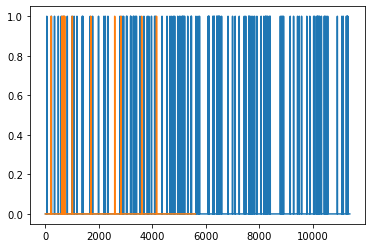

In [77]:
plt.plot(y_train)
plt.plot(pred)